In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [68]:
import sys 
print(sys.version)


3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]


In [69]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:DML:0


In [70]:
tf.test.is_gpu_available()


True

In [6]:
import tensorflow as tf
print(tf.__version__)

1.15.5


In [71]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import glob 

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [72]:
from tensorflow.python.client import  device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12088015932945555745,
 name: "/device:DML:0"
 device_type: "DML"
 memory_limit: 7282832180
 locality {
 }
 incarnation: 15198944019710069336
 physical_device_desc: "{\"name\": \"NVIDIA GeForce GTX 1080\", \"vendor_id\": 4318, \"device_id\": 7040, \"driver_version\": \"30.0.15.1165\"}",
 name: "/device:DML:1"
 device_type: "DML"
 memory_limit: 7449837620
 locality {
 }
 incarnation: 16303840093844850018
 physical_device_desc: "{\"name\": \"Intel(R) HD Graphics 630\", \"vendor_id\": 32902, \"device_id\": 22802, \"driver_version\": \"26.20.100.8142\"}"]

In [73]:
tf.test.is_gpu_available()


True

In [74]:
Images = Path('C:/Users/cip/Desktop/Oussama/Oussama_Horizon_Images/ALL_Horizon_Images')


In [75]:
filepaths = pd.Series(list(Images.glob(r'**/*.jpg')), name='Filepath').astype(str)

In [76]:
cl = pd.read_csv('C:/Users/cip/Desktop/Oussama/Oussama_Horizon_K/All_Horizon_L_V_R.csv')
cl_Left = cl.iloc[:,3].values
y_left = np.array(cl_Left)

y_left_V = y_left.reshape(5106 ,1)
len (y_left_V) 
y_left_V = y_left_V.reshape( 1, 5106 )
yl = y_left_V_s= pd.Series(y_left,name= 'yl')/100

print (y_left_V_s)

0       5.63
1       5.53
2       5.45
3       5.40
4       5.42
        ... 
5101    8.88
5102    8.90
5103    8.94
5104    8.96
5105    8.96
Name: yl, Length: 5106, dtype: float64


In [77]:
cl_right = cl.iloc[:,4].values
y_right =  np.array(cl_right)
y_right_V = y_right.reshape(5106,1)
len (y_right_V)
type(y_right_V)
yr= y_right_V_s= pd.Series(y_right, name= 'yr')/100
print (y_right_V_s)

0       6.59
1       6.67
2       6.70
3       6.71
4       6.70
        ... 
5101    3.23
5102    3.23
5103    3.22
5104    3.22
5105    3.22
Name: yr, Length: 5106, dtype: float64


In [30]:
type (yr)


pandas.core.series.Series

In [78]:
filepaths = pd.Series(list(Images.glob(r'**/*.jpg')), name='Filepath').astype(str)
print (filepaths)
type(filepaths)

0       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
1       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
2       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
3       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
4       C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
                              ...                        
5101    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5102    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5103    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5104    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
5105    C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...
Name: Filepath, Length: 5106, dtype: object


pandas.core.series.Series

In [79]:


ALL_Data = pd.concat([filepaths,yl,yr], axis = 1).sample(frac = 1.0, random_state=1).reset_index(drop=True)
print(ALL_Data)

                                               Filepath     yl     yr
0     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   9.35   3.25
1     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  10.28   3.23
2     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   7.21   2.97
3     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.24   5.01
4     C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.51   5.19
...                                                 ...    ...    ...
5101  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   4.93   5.56
5102  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   5.13   5.43
5103  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   2.19  10.83
5104  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  12.74   4.11
5105  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...   3.79   8.50

[5106 rows x 3 columns]


In [80]:
train_Data, test_Data = train_test_split(ALL_Data, train_size = 0.7, shuffle = True, random_state = 1  )

In [81]:
print(test_Data)

                                               Filepath    yl    yr
5073  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.43  5.26
3570  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  7.41  5.62
4428  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  8.19  5.42
2107  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  8.95  3.17
2185  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  7.34  1.08
...                                                 ...   ...   ...
568   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.95  7.18
5038  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.98  5.43
4900  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  6.58  1.58
376   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.13  8.19
2819  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  5.02  5.64

[1532 rows x 3 columns]


In [82]:
print(train_Data)


                                               Filepath    yl     yr
1785  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.61   3.72
2161  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  6.35   2.14
605   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  1.84  10.24
4963  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.88   4.76
3584  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  4.43   4.76
...                                                 ...   ...    ...
2895  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  7.51   1.20
2763  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.31   7.86
905   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  5.17   5.66
3980  C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  1.67  11.58
235   C:\Users\cip\Desktop\Oussama\Oussama_Horizon_I...  3.11   9.29

[3574 rows x 3 columns]


# # # # ****Loading Images****

In [83]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [84]:
train_images = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yl','yr'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe= train_Data,
    x_col='Filepath',
    y_col=['yl','yr'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=12,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe= test_Data,
    x_col='Filepath',
    y_col=['yl','yr'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=12,
    shuffle=False
)

Found 2860 validated image filenames.
Found 714 validated image filenames.
Found 1532 validated image filenames.


In [85]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2"

In [95]:
mobile = tf.keras.applications.mobilenet.MobileNet()
x = mobile.layers[-2].output 
x = tf.keras.layers.Dense(1000/4)(x)
x = tf.keras.layers.Dense(1000/16)(x)
outputs = tf.keras.layers.Dense(2)(x)

# outputs = tf.keras.applications.mobilenet.MobileNet().layers[-1].output

model = tf.keras.Model(inputs=mobile.input, outputs=outputs)

model.summary()


Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128

In [44]:
# from tensorflow import keras 
# import keras as k
# base = k.applications.MobileNetV3Small(
#                 input_shape=(image_size,image_size,1),
#                 minimalistic=False,
#                 include_top=True,
#                 weights="imagenet")
# base.trainable = False

# In = k.Input(shape=(image_size,image_size,1))

# x = base(In, training=False)

# x = k.layers.GlobalAveragePooling2D()(x)

# Out = k.layers.Dense(num_classes,activation='softmax')(x)

# model = k.Model(In, Out)

In [48]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [49]:
model.compile(
    optimizer='adam',
    loss='mse',
   metrics=['mse', 'mae', 'mape']
)


In [50]:
history = model.fit(
    train_images,
    validation_data=val_images,
#       batch_size=64,
    epochs= 300,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True
#         )
#     ]
)

Epoch 1/300
239/239 [==============================] - 36s 151ms/step - loss: 5.8561 - mean_squared_error: 5.8697 - mean_absolute_error: 1.6357 - mean_absolute_percentage_error: 1056642.8750 - val_loss: 2.8540 - val_mean_squared_error: 2.8636 - val_mean_absolute_error: 1.1811 - val_mean_absolute_percentage_error: 31.8015 2.5675 - mean_absolute_error: 1.1569 - mean_absolute_percentage_error - ETA: 17s - loss: 2.8734 - mean_squared_error: 2.8734 - mean_absolute_error: 1.1813 - mean_absolute_percentage_error: 31.84
Epoch 2/300
239/239 [==============================] - 27s 113ms/step - loss: 3.0866 - mean_squared_error: 3.0839 - mean_absolute_error: 1.2128 - mean_absolute_percentage_error: 513165.2188 - val_loss: 3.3102 - val_mean_squared_error: 3.3249 - val_mean_absolute_error: 1.2403 - val_mean_absolute_percentage_error: 36.2496
Epoch 3/300
239/239 [==============================] - 27s 114ms/step - loss: 2.7691 - mean_squared_error: 2.7588 - mean_absolute_error: 1.1438 - mean_absolute_

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error'])


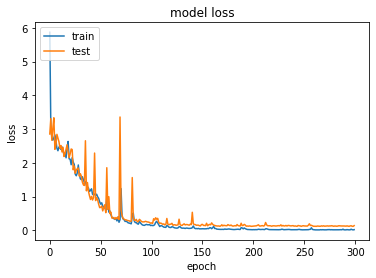

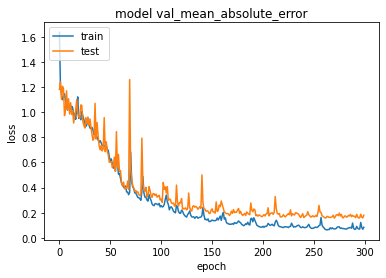

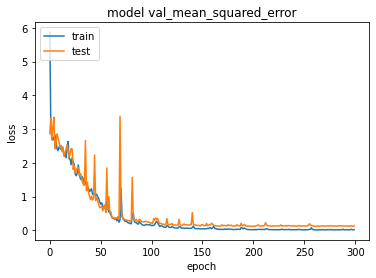

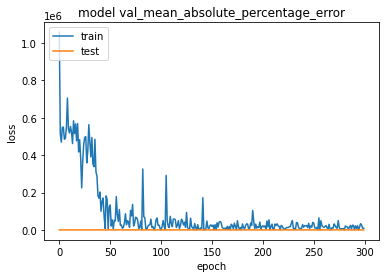

In [51]:

import matplotlib.pyplot as plt
import numpy
# list all data in history
print(history.history.keys())
# summarize history for accuracy

###Val_Loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
###val_mean_absolute_error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model val_mean_absolute_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
###val_mean_squared_error
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model val_mean_squared_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
###val_mean_squared_error
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model val_mean_absolute_percentage_error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
predicted_coordination = np.squeeze(model.predict(test_images))*100
true_coordination = test_images.labels*100
print('-----> The predected Coordination:')
print (predicted_coordination)
print('-----> The real Coordination:')
print(true_coordination)
print ('------> The averge Error')
rmse = np.sqrt(model.evaluate(test_images, verbose=1))
# print("     Test RMSE: {:.5f}".format(rmse))
print (rmse)

r2 = r2_score(true_coordination, predicted_coordination)
# print("Test R^2 Score: {:.5f}".format(r2))
print (r2)

-----> The predected Coordination:
[[424.33124 523.7925 ]
 [738.5824  572.29114]
 [818.9457  545.5023 ]
 ...
 [655.9296  164.90494]
 [361.3696  830.3689 ]
 [466.1721  584.8296 ]]
-----> The real Coordination:
[[443. 526.]
 [741. 562.]
 [819. 542.]
 ...
 [658. 158.]
 [313. 819.]
 [502. 564.]]
------> The averge Error
128/128 [==============================] - 10s 80ms/step - loss: 0.3577 - mean_squared_error: 0.3586 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 5.6551
[0.59809172 0.5987982  0.43424039 2.37804569]
0.9349607846074346


In [53]:

type(predicted_coordination)
predicted_coordination_Dataframe= pd.DataFrame(predicted_coordination, columns = ['yl_p', 'yr_p'])
type(true_coordination)
true_coordination_Dataframe= pd.DataFrame(true_coordination, columns = ['yl_t','yr_t'])

yl_p = predicted_coordination_Dataframe['yl_p']
yl_t = true_coordination_Dataframe['yl_t']

yr_p = predicted_coordination_Dataframe['yr_p']
yr_t = true_coordination_Dataframe['yr_t']
# print (true_coordination_Dataframe)
# print(predicted_coordination_Dataframe)
yl_tp=  pd.concat ([yl_t,yl_p], axis = 1)
yr_tp=  pd.concat ([yr_t,yr_p], axis = 1)


In [54]:
from tensorflow.keras.models import load_model
filename = "Mobild_Net.joblib"
model.save(filename)
loded_model_Mobile_net = load_model("Mobild_Net.joblib")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<AxesSubplot:>

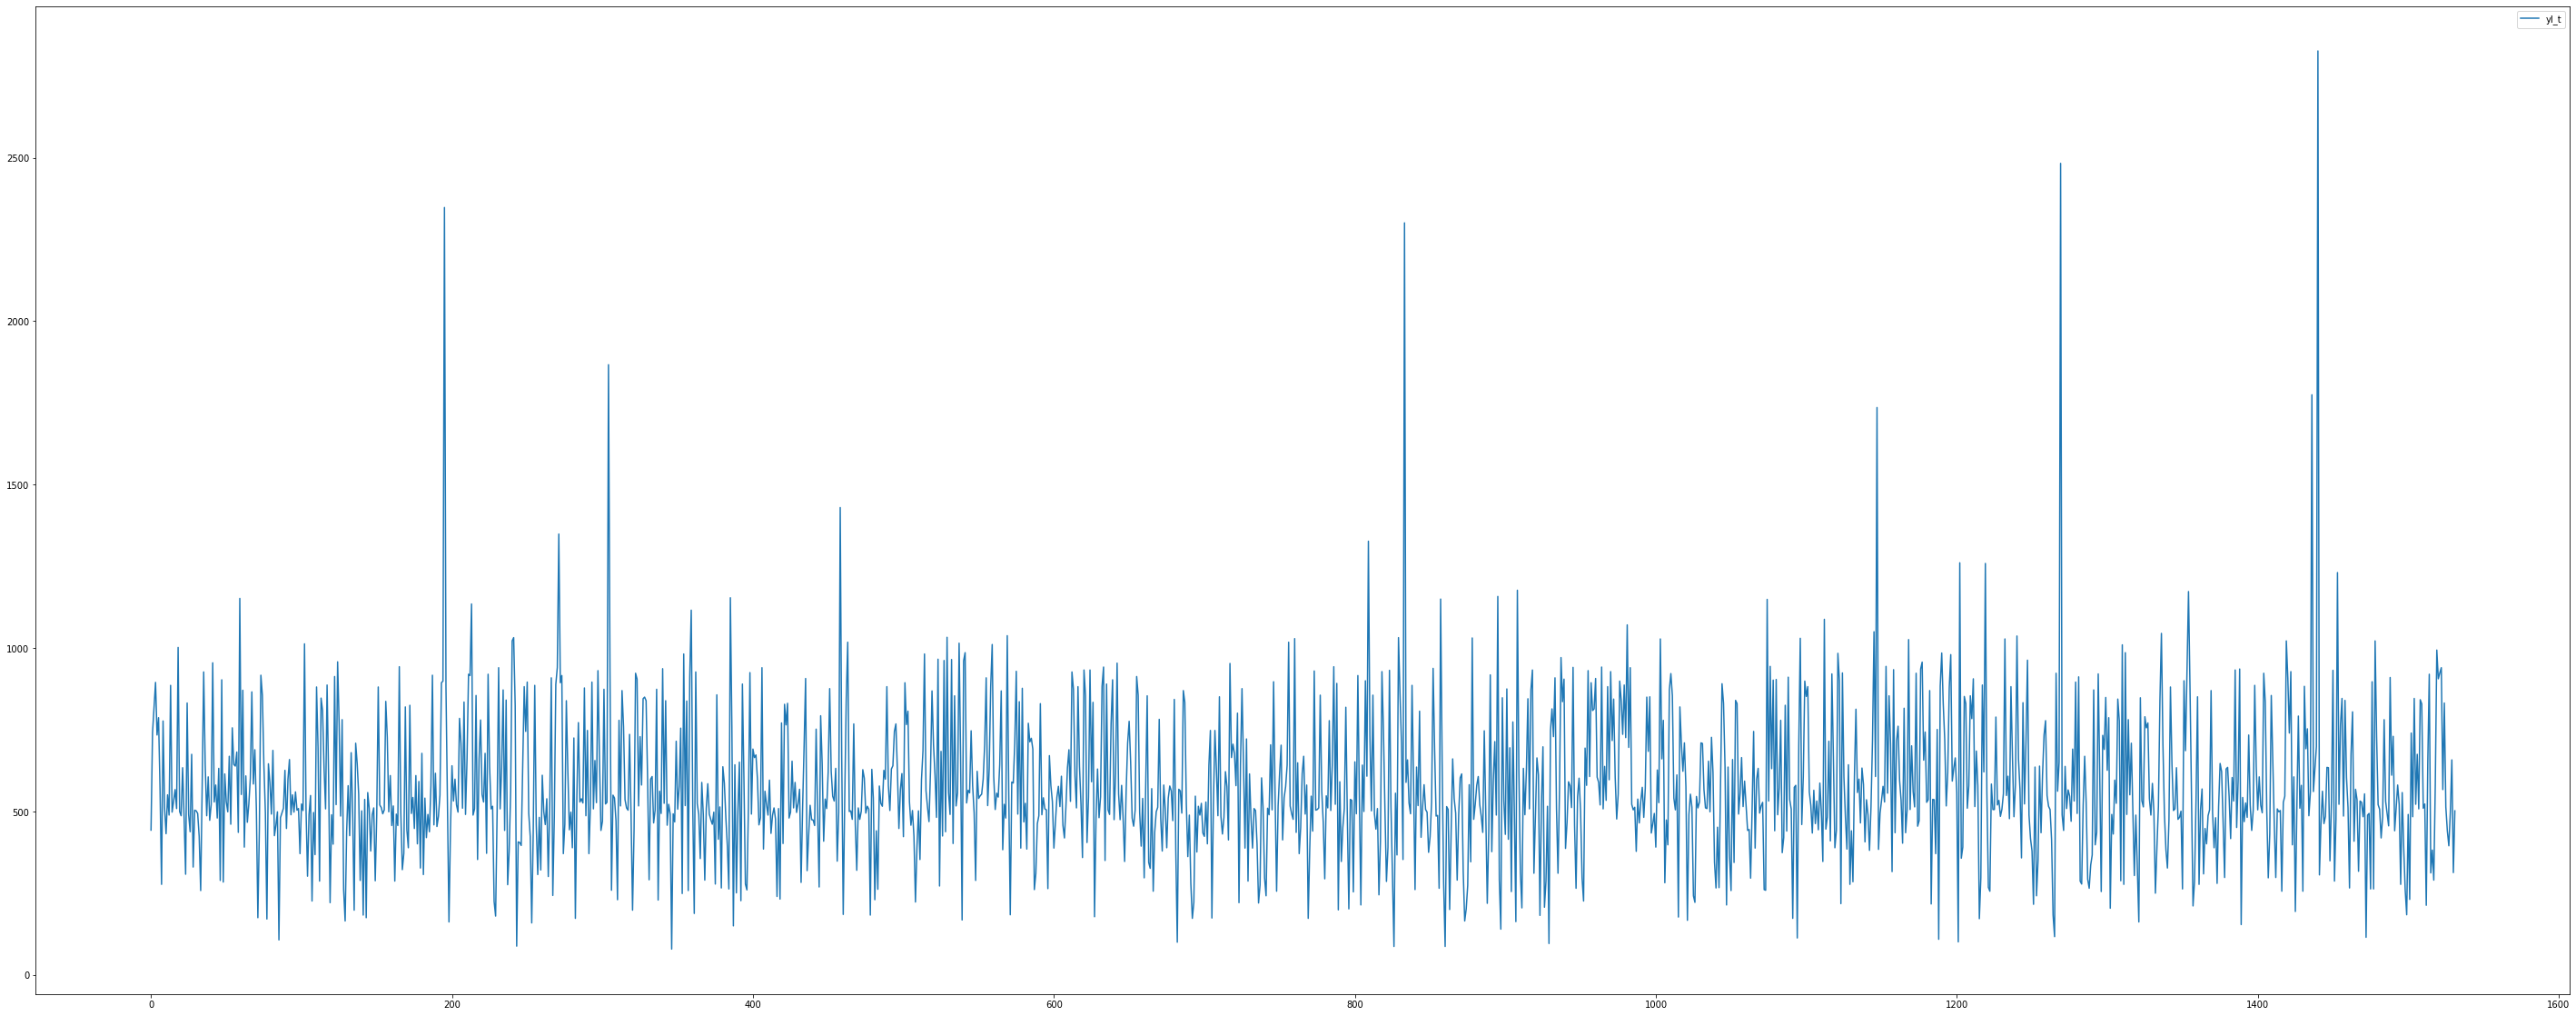

In [55]:
yl_tp.plot(y= ['yl_t'],figsize=(50, 20))


<AxesSubplot:>

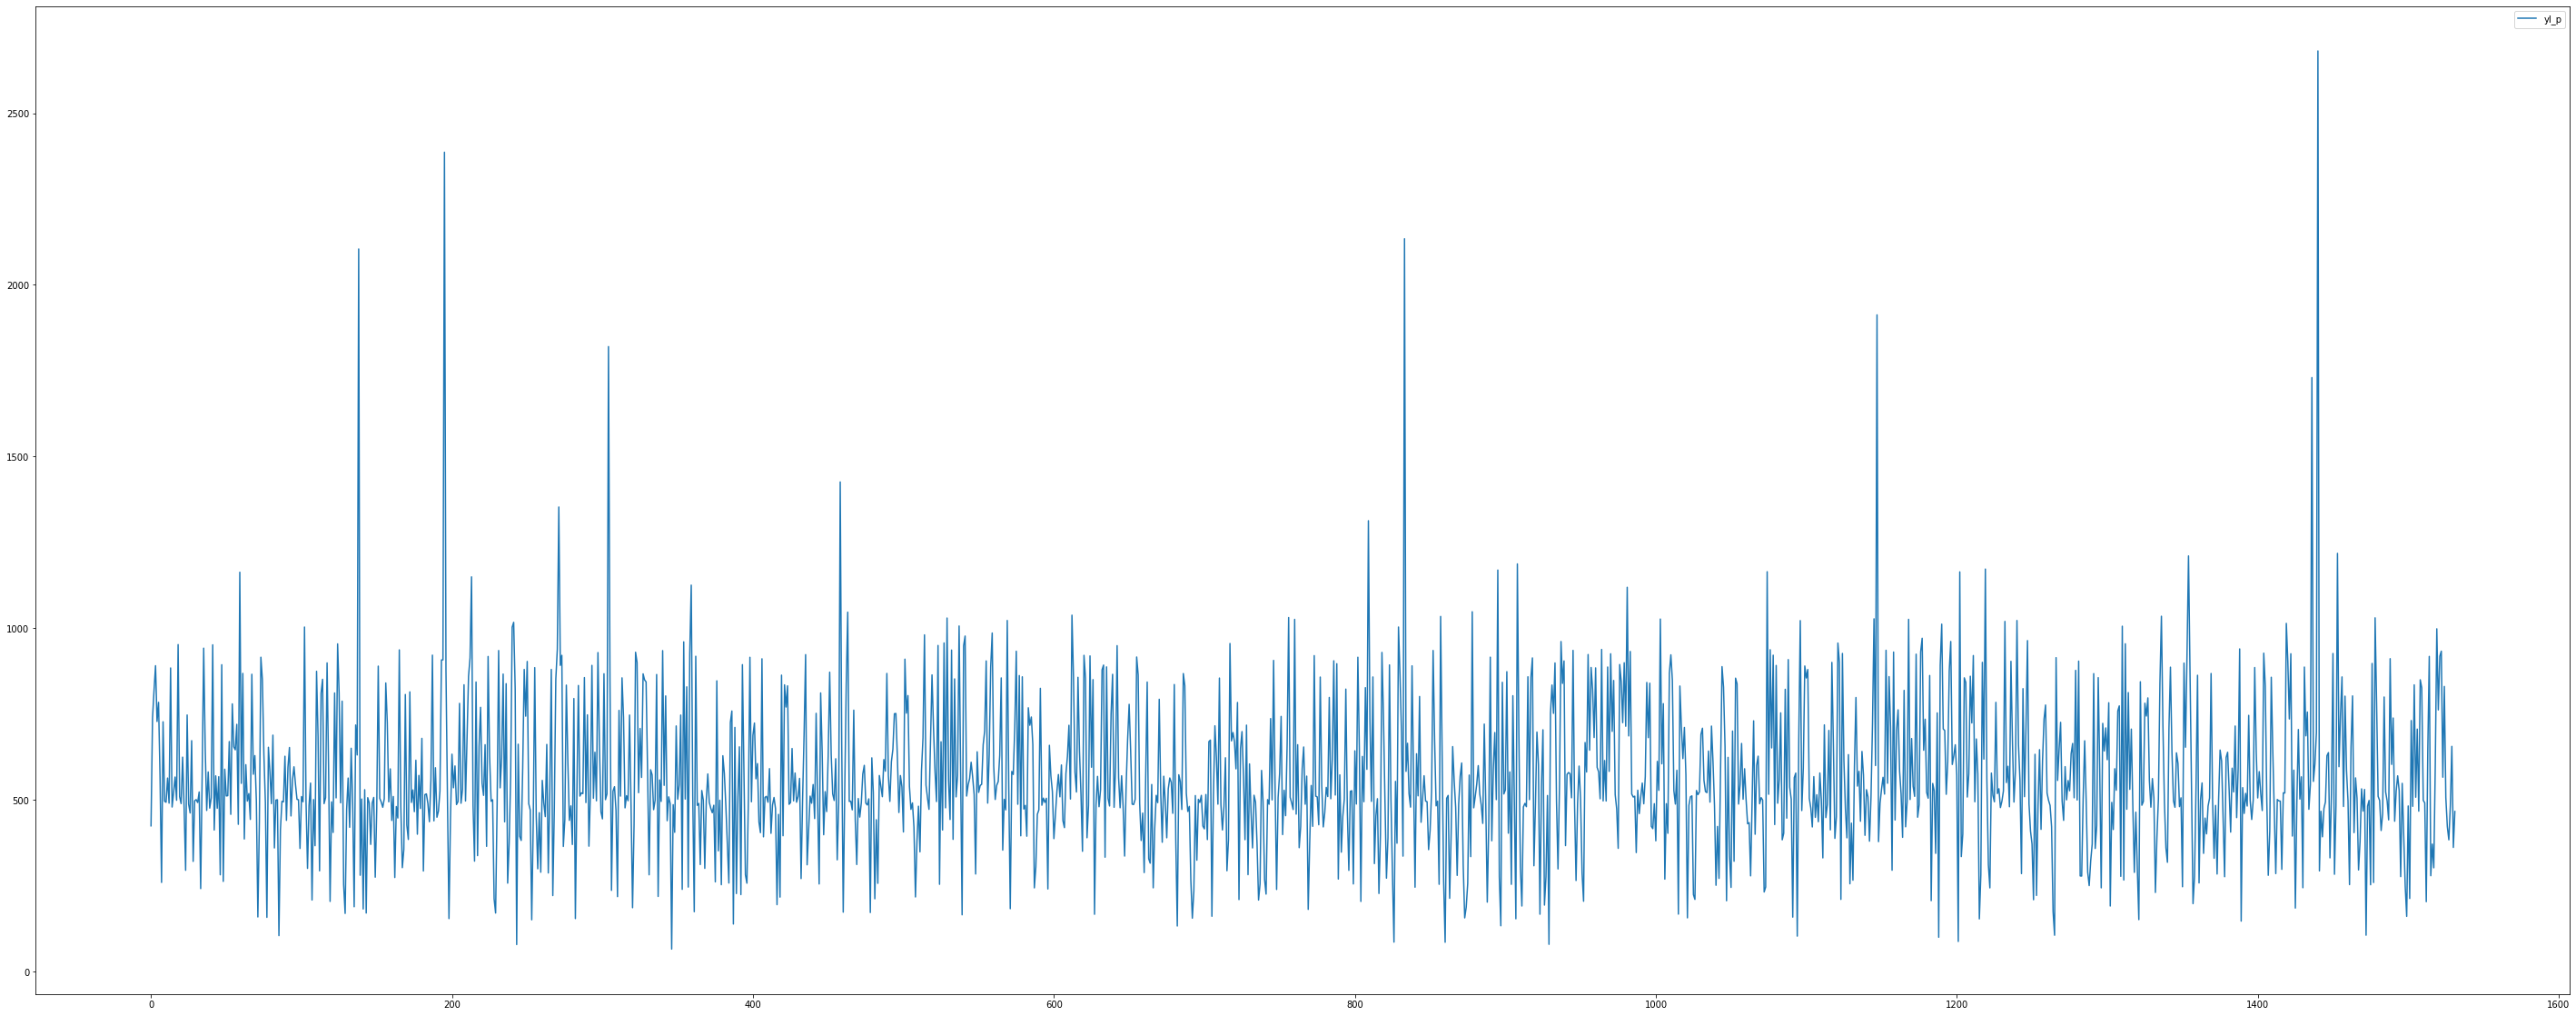

In [56]:
yl_tp.plot(y= ['yl_p'],figsize=(50, 20))


Text(0, 0.5, 'Die wahre und prädizierten Koordinaten von Yl [px]')

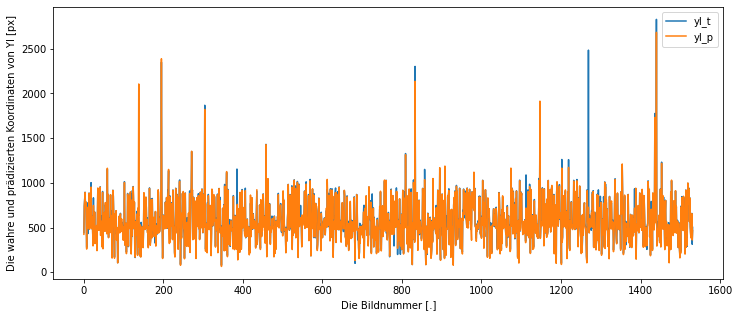

In [61]:
b= yl_tp
b.plot(y= ['yl_t','yl_p'],figsize=(12, 5))
plt.xlabel("Die Bildnummer [.]")
plt.ylabel("Die wahre und prädizierten Koordinaten von Yl [px]")

<AxesSubplot:>

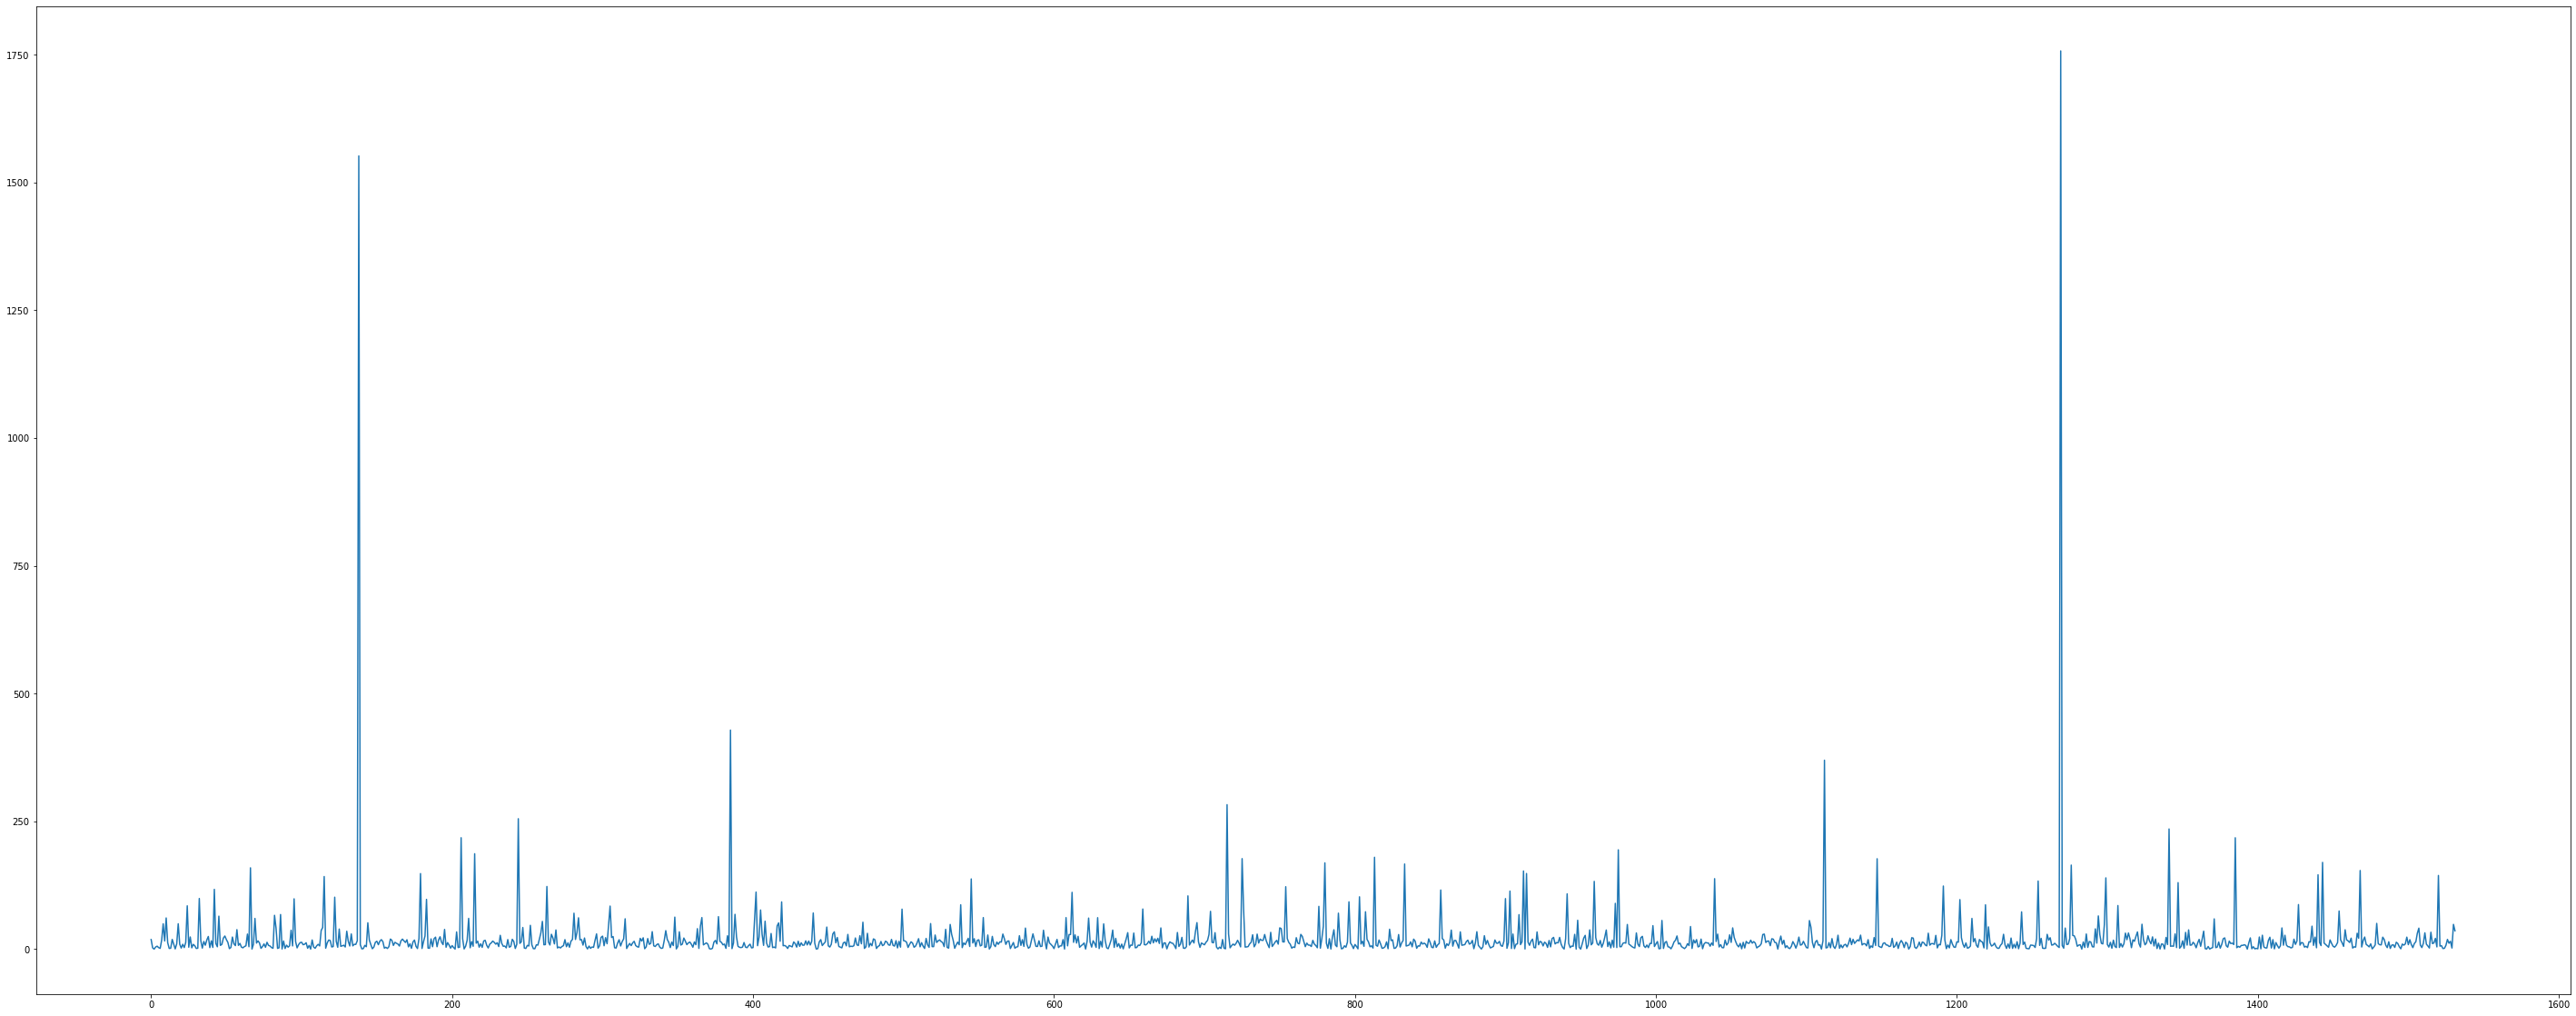

In [57]:
yl_d = abs(yl_t -yl_p)
# print(yl_d)
yl_d.plot(figsize=(50, 20))

Text(0, 0.5, 'Die Differenz zwischen den Koordinaten von Yl [px] ')

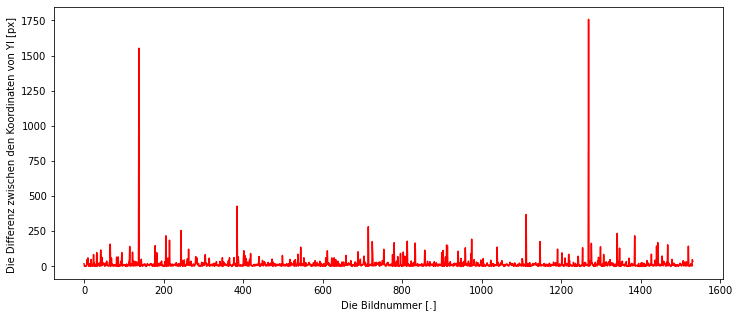

In [62]:
yl_d = abs(yl_t -yl_p)
# print(yl_d)
yl_d.plot(figsize=(12, 5),color="r")
plt.xlabel("Die Bildnummer [.]")
plt.ylabel("Die Differenz zwischen den Koordinaten von Yl [px] ")

<AxesSubplot:>

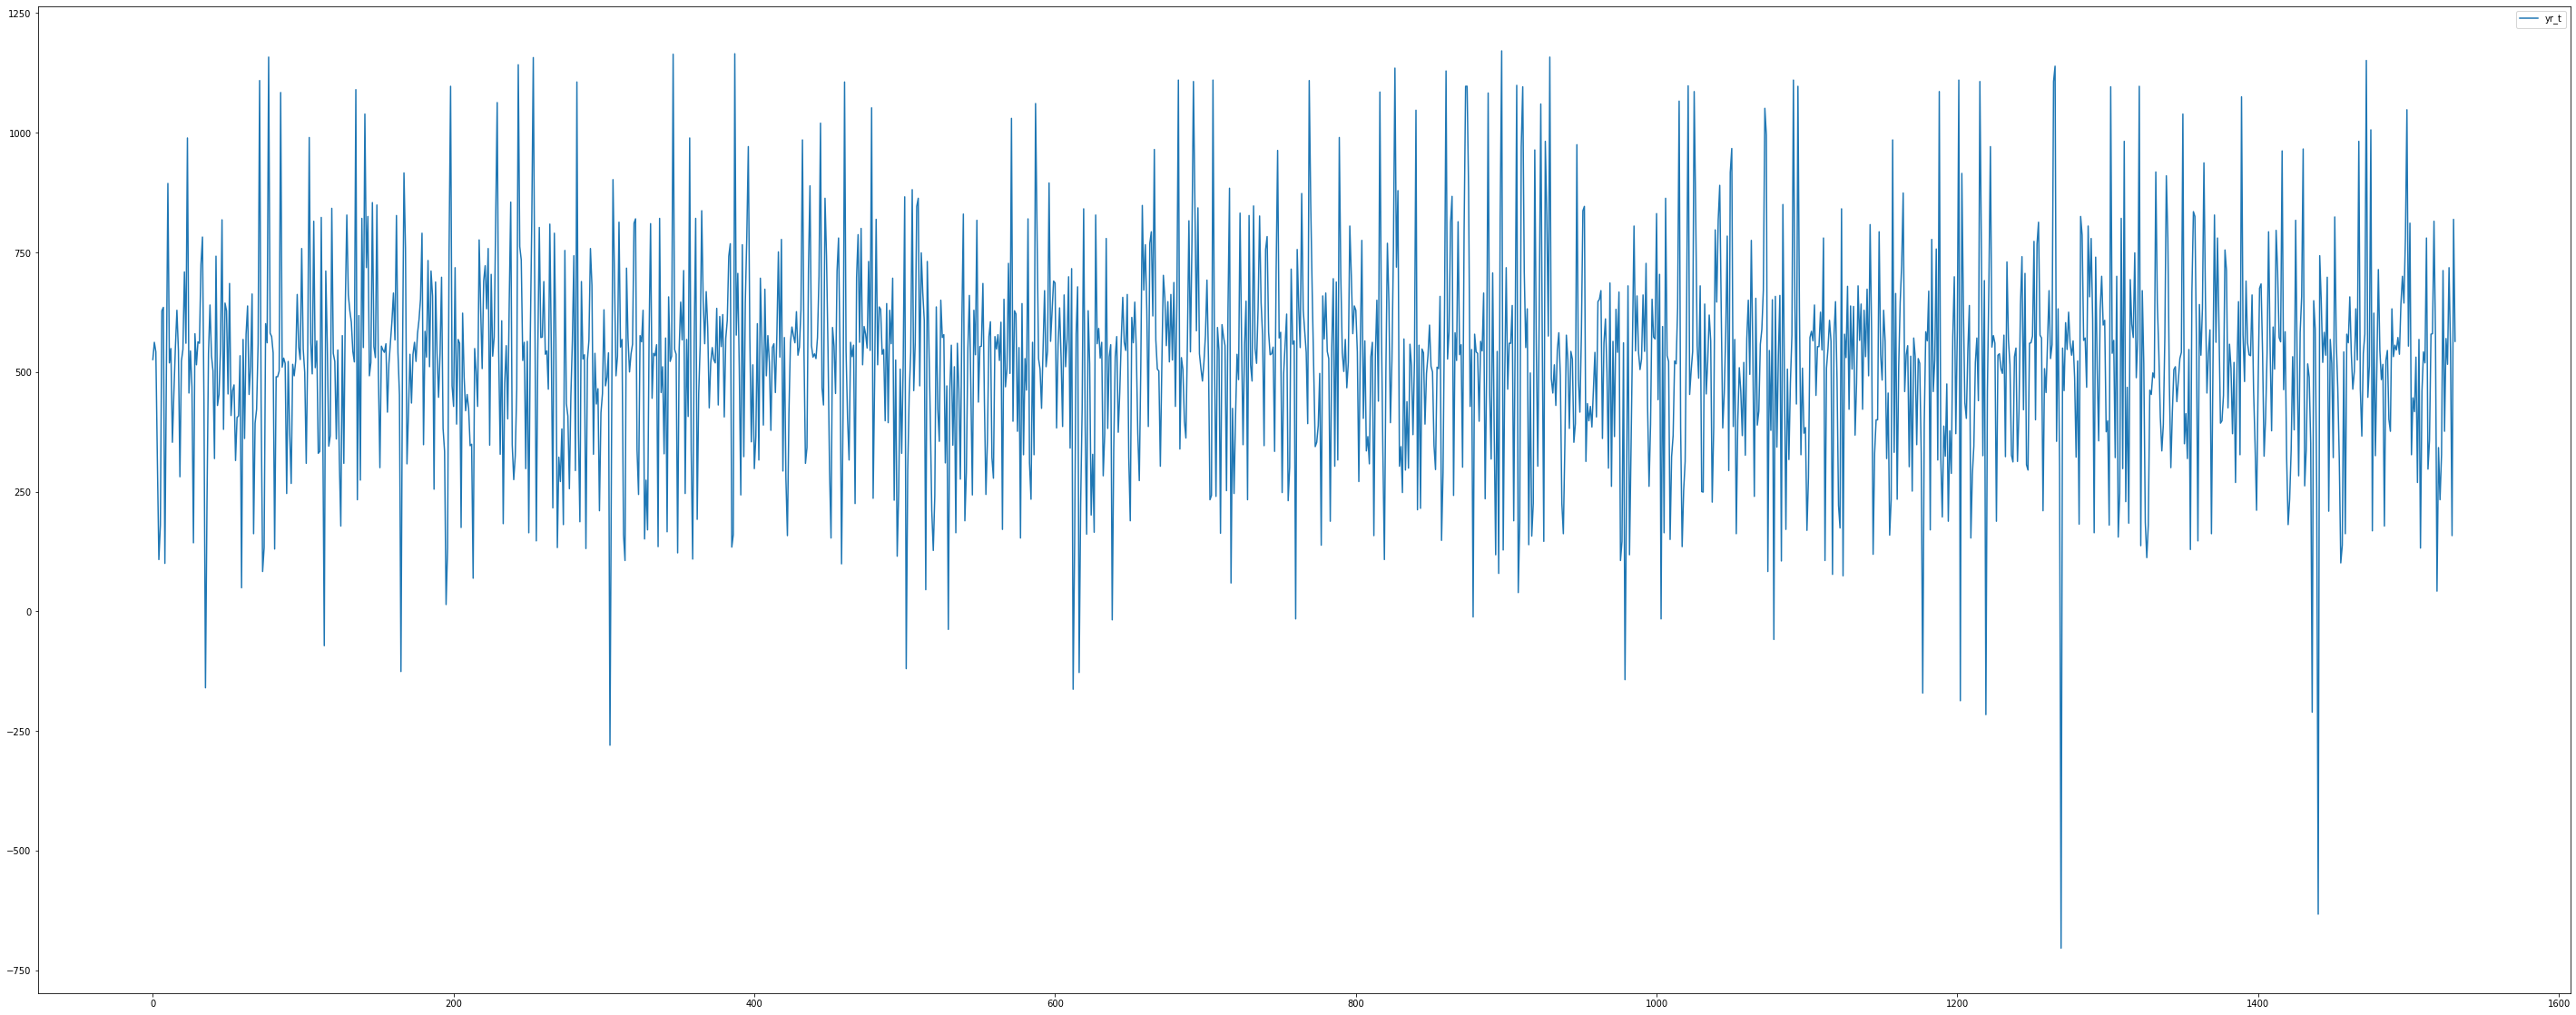

In [58]:
yr_tp.plot(y= ['yr_t'],figsize=(50, 20))

<AxesSubplot:>

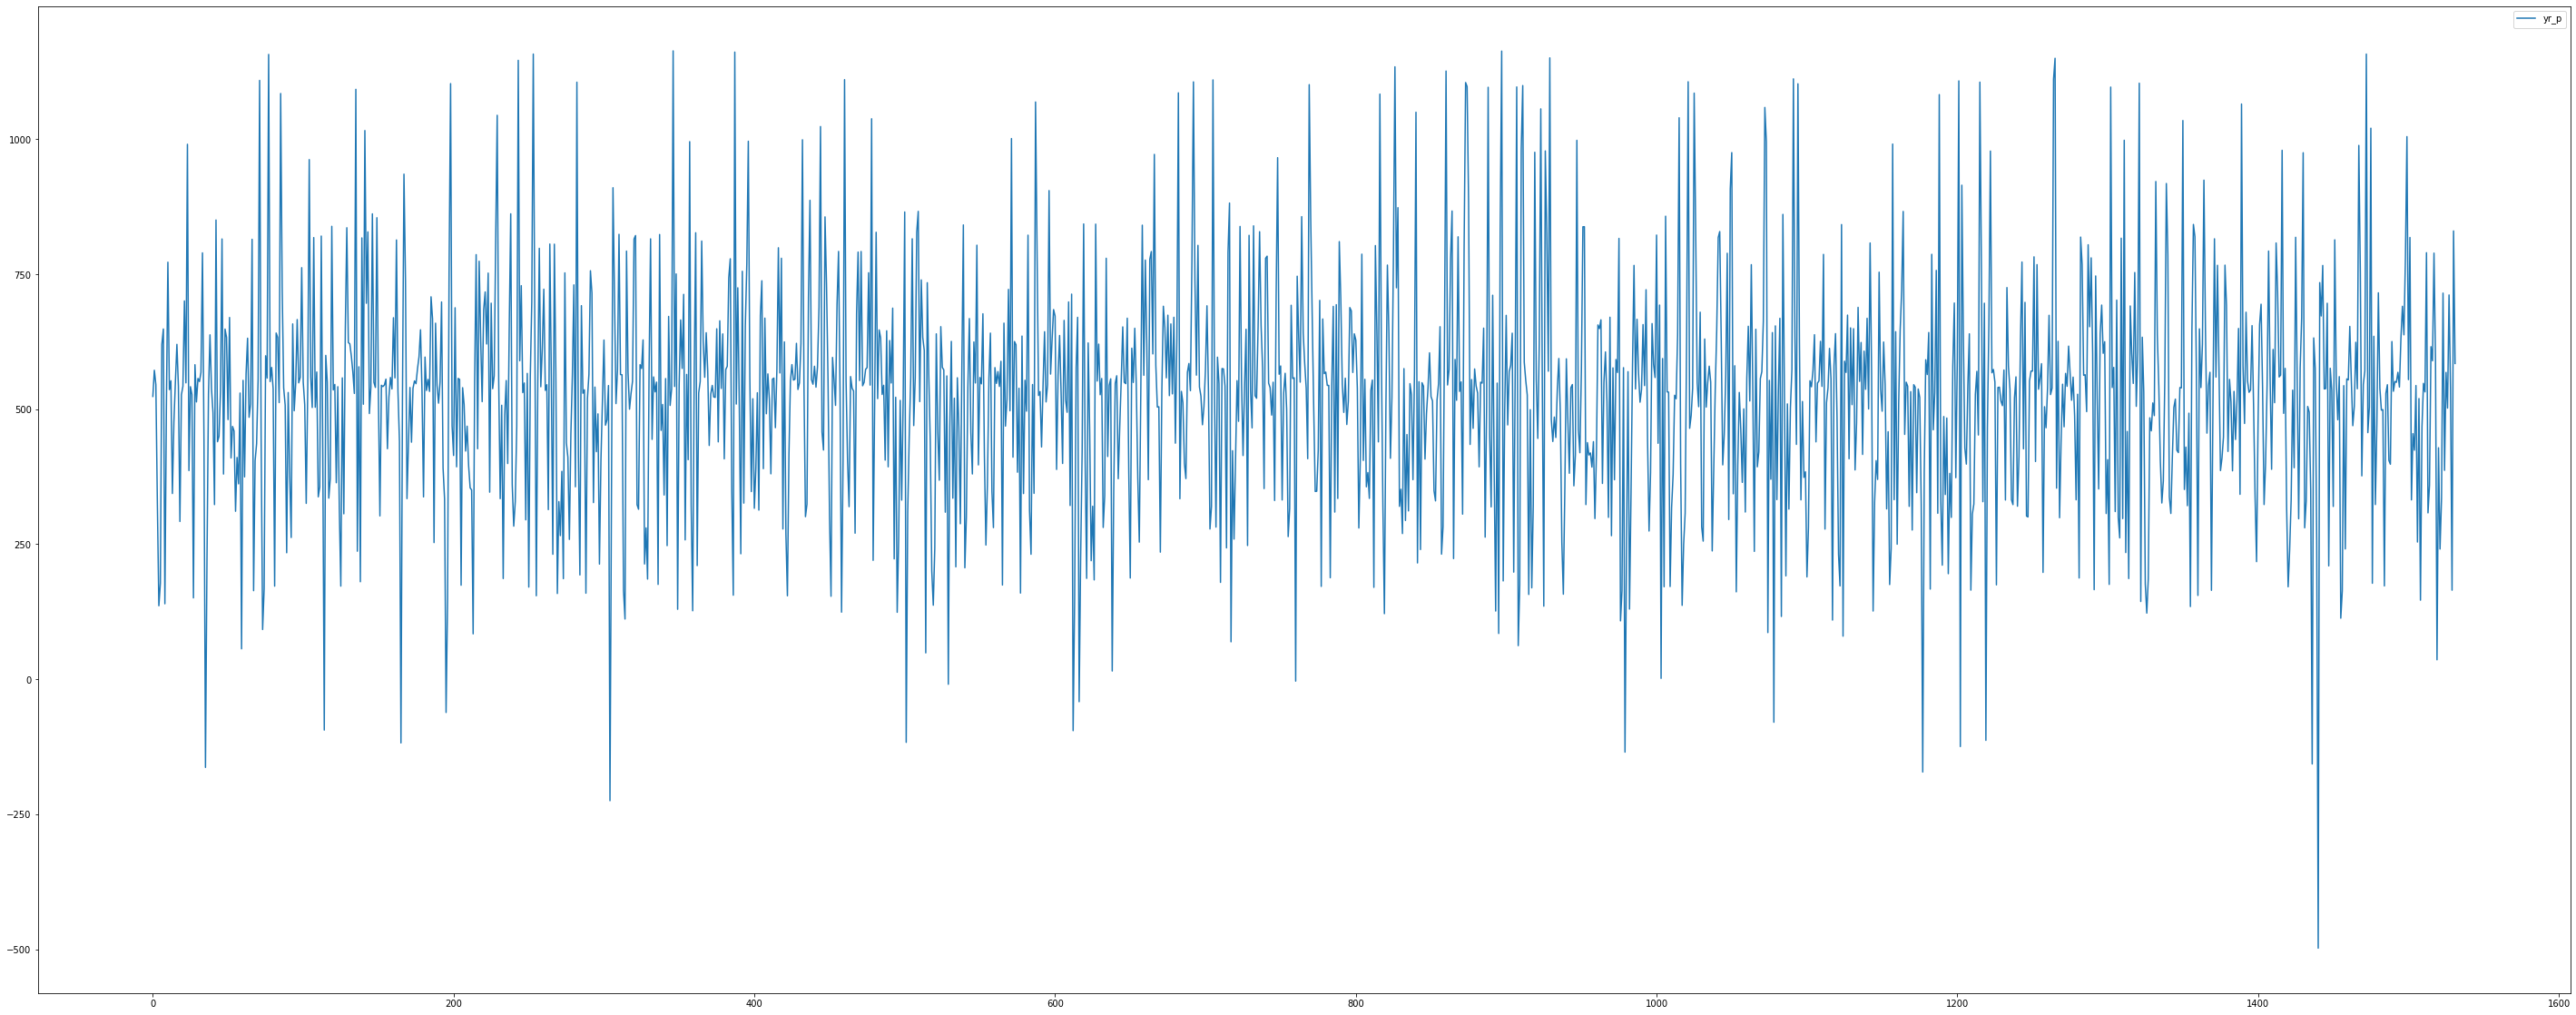

In [59]:
yr_tp.plot(y= ['yr_p'],figsize=(50, 20))


Text(0, 0.5, 'Die wahre und prädizierten Koordinaten von Yr [px]')

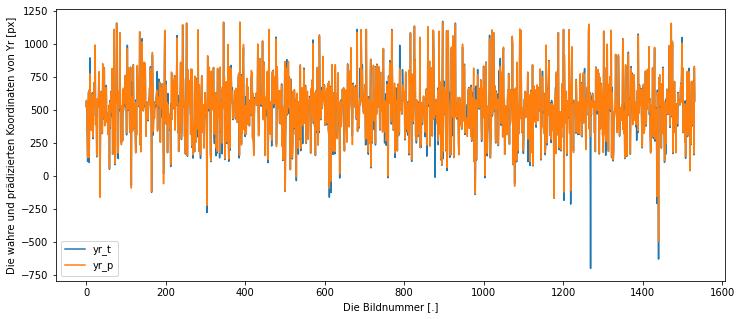

In [63]:
b= yr_tp
b.plot(y= ['yr_t','yr_p'],figsize=(12, 5))
plt.xlabel("Die Bildnummer [.]")
plt.ylabel("Die wahre und prädizierten Koordinaten von Yr [px]")

<AxesSubplot:>

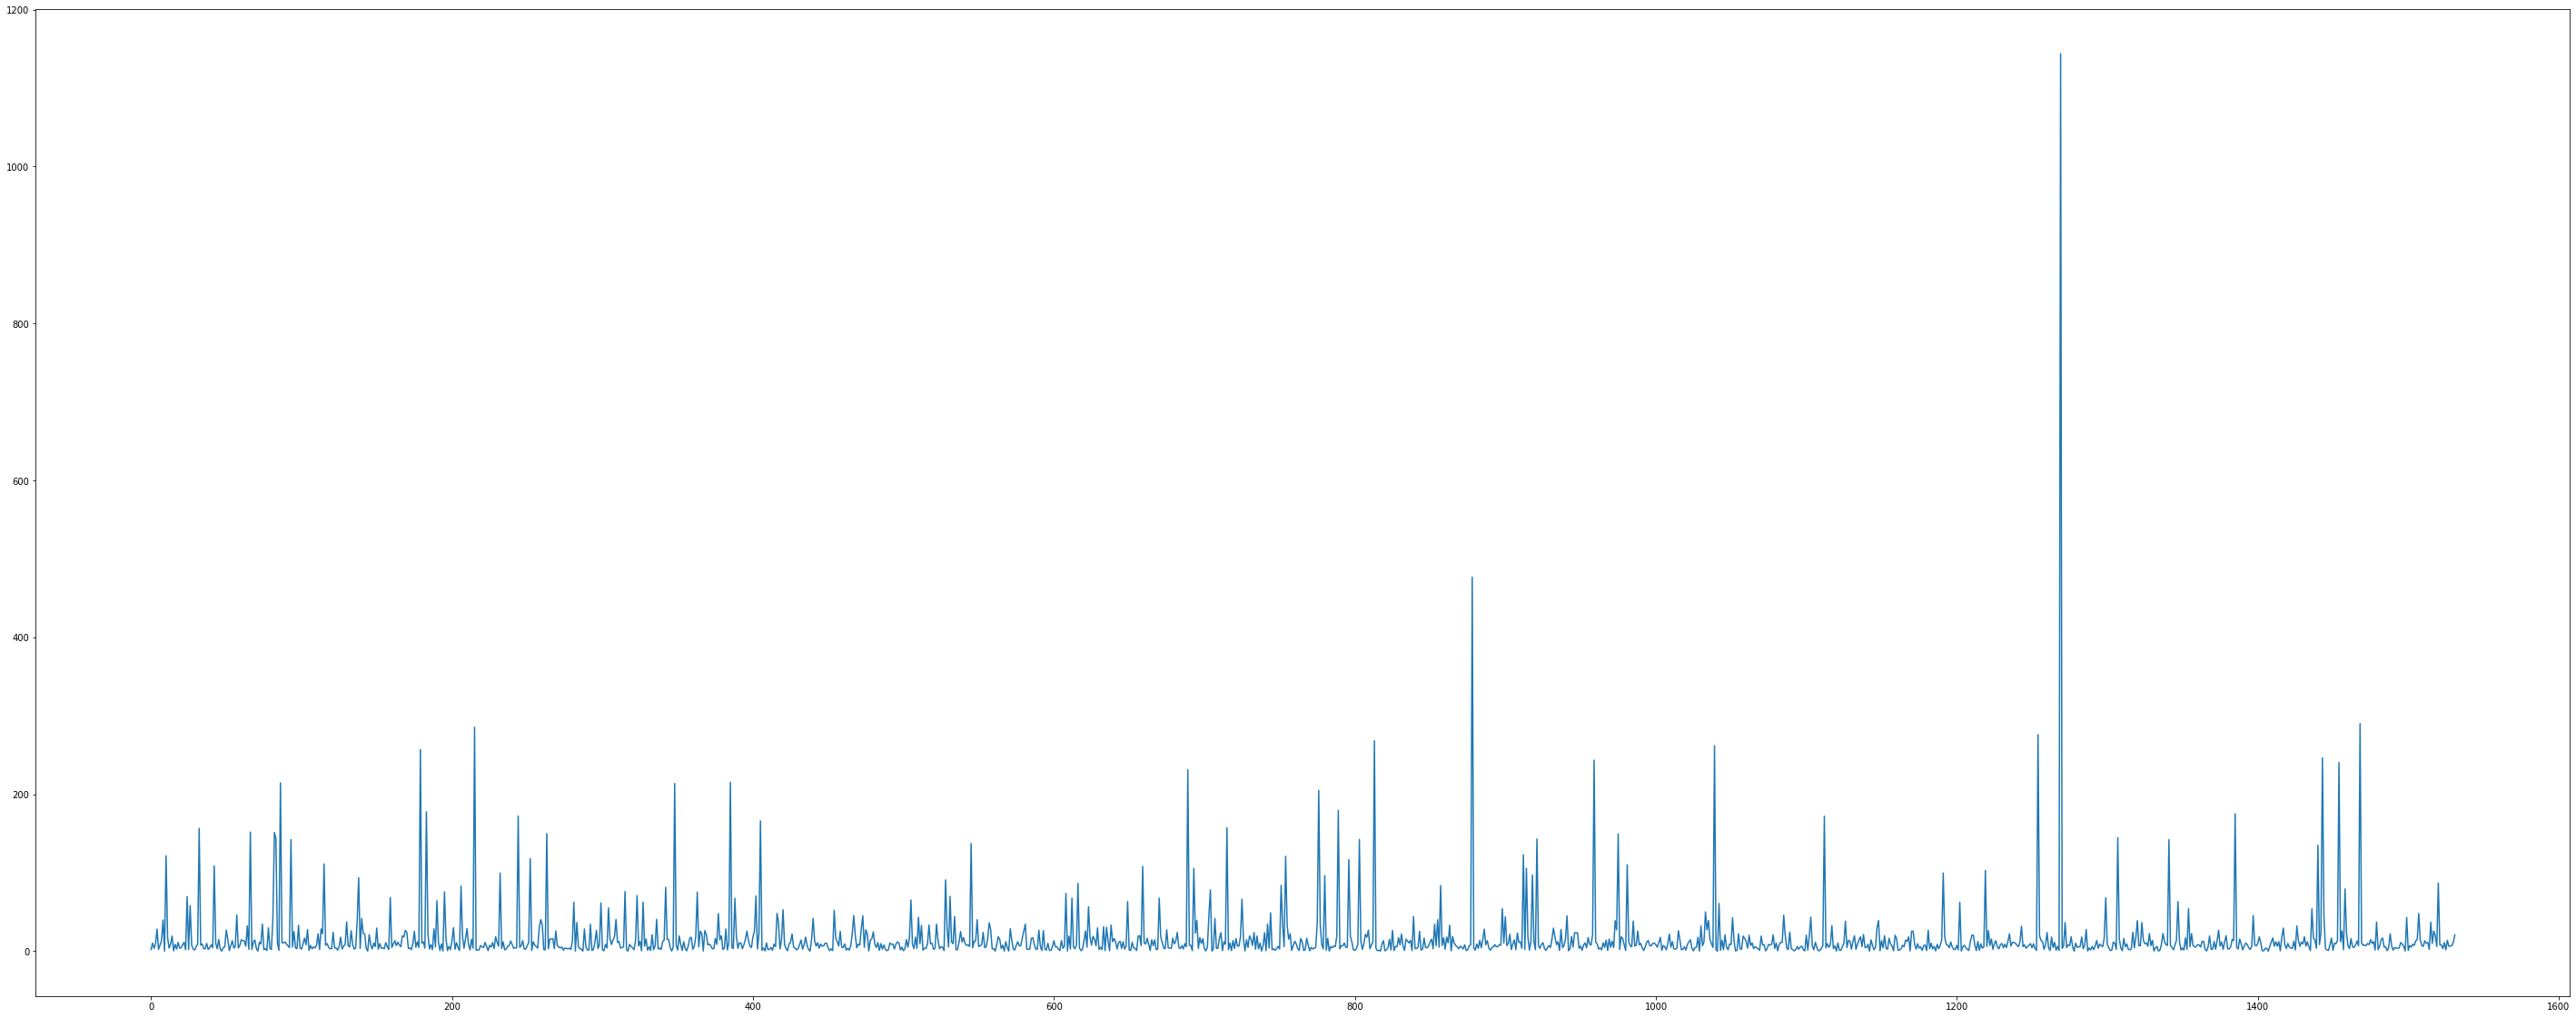

In [60]:
yr_d = abs(yr_t -yr_p)
# print(yl_d)
yr_d.plot(figsize=(50, 20))

Text(0, 0.5, 'Die Differenz zwischen den Koordinaten von Yr [px] ')

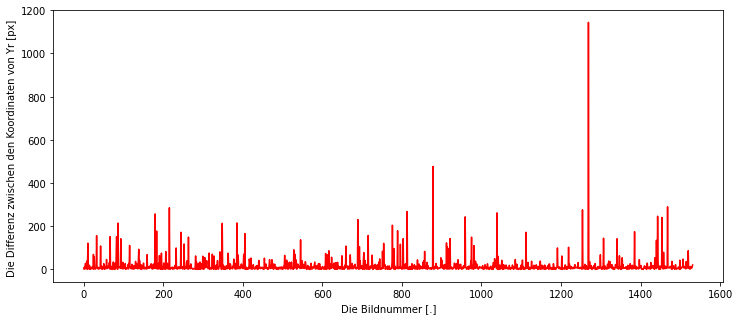

In [64]:
yr_d = abs(yr_t -yr_p)
# print(yl_d)
yr_d.plot(figsize=(12, 5),color="r")

plt.xlabel("Die Bildnummer [.]")
plt.ylabel("Die Differenz zwischen den Koordinaten von Yr [px] ")